# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
from citipy import citipy
import pandas as pd
import time, numpy as np, requests as rq
from api_keys import weather_api_key
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import linregress

## Generate Cities List

In [7]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

559

In [8]:
 #Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = rq.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")



Beginning Data Retrieval 
-------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 : mahibadhoo
Processing Record 2 of Set 1 : guerrero negro
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : port elizabeth
Processing Record 5 of Set 1 : vaini
Processing Record 6 of Set 1 : busselton
Processing Record 7 of Set 1 : saint george
Processing Record 8 of Set 1 : kavieng
Processing Record 9 of Set 1 : yellowknife
Processing Record 10 of Set 1 : bredasdorp
Processing Record 11 of Set 1 : khatanga
Processing Record 12 of Set 1 : tessalit
Processing Record 13 of Set 1 : butaritari
Processing Record 14 of Set 1 : sorgun
Processing Record 15 of Set 1 : saint-philippe
Processing Record 16 of Set 1 : mezen
Processing Record 17 of Set 1 : yarmouth
Processing Record 18 of Set 1 : montorio al vomano
Processing Record 19 of Set 1 : saskylakh
Processing Record 20 of Set 1 : hobart
Processing Record 21 of Set 1 : mareeba
Processing Record 22 of Set 1 : 

Processing Record 37 of Set 4 : roebourne
Processing Record 38 of Set 4 : malamig
Processing Record 39 of Set 4 : esperance
Processing Record 40 of Set 4 : moose factory
Processing Record 41 of Set 4 : mashhad
Processing Record 42 of Set 4 : tasiilaq
Processing Record 43 of Set 4 : rosa zarate
Processing Record 44 of Set 4 : north ogden
Processing Record 45 of Set 4 : beringovskiy
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 46 of Set 4 : richmond
Processing Record 47 of Set 4 : grand gaube
Processing Record 48 of Set 4 : narsaq
Processing Record 49 of Set 4 : jieshi
City not found. Skipping...
Processing Record 50 of Set 4 : dali
Processing Record 0 of Set 5 : lundamo
Processing Record 1 of Set 5 : shingu
Processing Record 2 of Set 5 : ixtapa
Processing Record 3 of Set 5 : vestmannaeyjar
Processing Record 4 of Set 5 : ibague
Processing Record 5 of Set 5 : pasighat
Processing Record 6 of Set 5 : isangel
Processing Record 7 of Set

Processing Record 20 of Set 8 : talcahuano
Processing Record 21 of Set 8 : batagay-alyta
Processing Record 22 of Set 8 : lamu
Processing Record 23 of Set 8 : norman wells
Processing Record 24 of Set 8 : harper
City not found. Skipping...
Processing Record 25 of Set 8 : agadez
Processing Record 26 of Set 8 : noumea
Processing Record 27 of Set 8 : kasongo-lunda
Processing Record 28 of Set 8 : raudeberg
Processing Record 29 of Set 8 : mount gambier
Processing Record 30 of Set 8 : manzhouli
Processing Record 31 of Set 8 : taunggyi
Processing Record 32 of Set 8 : sosua
Processing Record 33 of Set 8 : naze
Processing Record 34 of Set 8 : ilulissat
Processing Record 35 of Set 8 : preobrazheniye
Processing Record 36 of Set 8 : bintulu
Processing Record 37 of Set 8 : canoinhas
Processing Record 38 of Set 8 : kaabong
Processing Record 39 of Set 8 : krasnoselkup
Processing Record 40 of Set 8 : edd
Processing Record 41 of Set 8 : alice springs
Processing Record 42 of Set 8 : warwick
City not found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
len("date_list")

9

In [11]:
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
"Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list  })
weather_data

weather_data_humidity_lesthan_100 = weather_data
weather_data["Humidity"] = weather_data["Humidity"].map("{:d}".format)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Mahibadhoo,3.7833,72.9667,82.47,76,33,17.05,MV,1630073589
1,Guerrero Negro,27.9769,-114.0611,74.23,75,6,3.04,MX,1630073439
2,Rikitea,-23.1203,-134.9692,72.84,71,3,16.82,PF,1630073589
3,Port Elizabeth,-33.9180,25.5701,59.29,51,20,32.21,ZA,1630073590
4,Vaini,-21.2000,-175.2000,66.36,77,75,9.22,TO,1630073590
...,...,...,...,...,...,...,...,...,...
511,Laas,46.6166,10.7002,75.11,33,21,4.61,IT,1630073747
512,Road Town,18.4167,-64.6167,87.21,79,40,14.97,VG,1630073609
513,Yerbogachën,61.2767,108.0108,50.07,67,24,3.60,RU,1630073532
514,Pata,17.7152,121.5018,77.41,84,99,3.76,PH,1630073747


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
weather_data['Humidity'] = pd.to_numeric(weather_data['Humidity'])
weather_data['Lat'] = pd.to_numeric(weather_data['Lat'])
weather_data['Lng'] = pd.to_numeric(weather_data['Lng'])
weather_data.to_csv("output_data/cities.csv")

In [13]:
#  Get the indices of cities that have humidity over 100%.

index_humidity_greater_thn_100 = weather_data[ weather_data['Humidity'] > 100 ].index



In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# So far did not see a city with more than 100 % humidity. This code is in place just in case.
weather_data.drop(index_humidity_greater_thn_100, inplace = True)

weather_data.to_csv("output_data/cities_clean.csv")
weather_data


,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Mahibadhoo,3.7833,72.9667,82.47,76,33,17.05,MV,1630073589
1,Guerrero Negro,27.9769,-114.0611,74.23,75,6,3.04,MX,1630073439
2,Rikitea,-23.1203,-134.9692,72.84,71,3,16.82,PF,1630073589
3,Port Elizabeth,-33.9180,25.5701,59.29,51,20,32.21,ZA,1630073590
4,Vaini,-21.2000,-175.2000,66.36,77,75,9.22,TO,1630073590
...,...,...,...,...,...,...,...,...,...
511,Laas,46.6166,10.7002,75.11,33,21,4.61,IT,1630073747
512,Road Town,18.4167,-64.6167,87.21,79,40,14.97,VG,1630073609
513,Yerbogachën,61.2767,108.0108,50.07,67,24,3.60,RU,1630073532
514,Pata,17.7152,121.5018,77.41,84,99,3.76,PH,1630073747


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

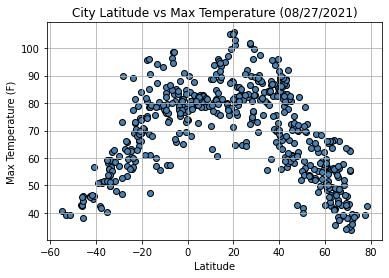

In [15]:

today = date.today()

# dd/mm/YY
d1 = today.strftime("%m/%d/%Y")
#print("d1 =", d1)

plt.title(f"City Latitude vs Max Temperature ({d1})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")
plt.grid()
fileLocation = f"Images/City Latitude vs Max Temperature.png"
plt.savefig(fileLocation)

## Latitude vs. Humidity Plot

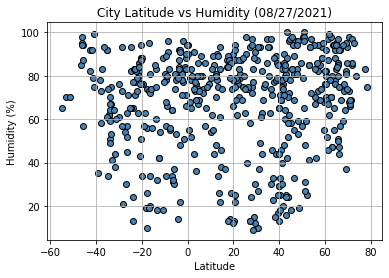

In [16]:

plt.title(f"City Latitude vs Humidity ({d1})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")
plt.grid()

plt.savefig(f"Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

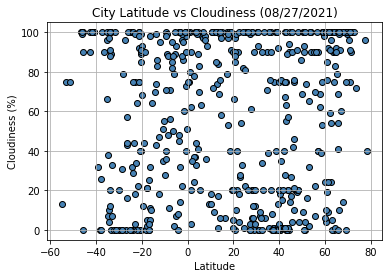

In [17]:
plt.title(f"City Latitude vs Cloudiness ({d1})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")
plt.grid()

plt.savefig(f"Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

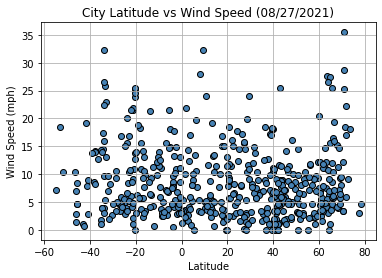

In [18]:
plt.title(f"City Latitude vs Wind Speed ({d1})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")
plt.grid()

plt.savefig(f"Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [23]:
northern_hemisphere_df = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere_df = weather_data.loc[weather_data["Lat"]< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

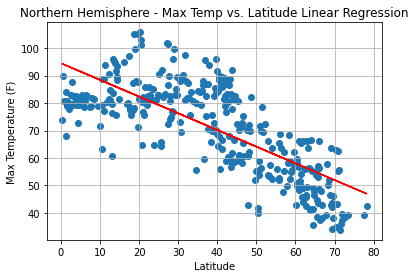

In [30]:
x_values = pd.to_numeric(northern_hemisphere_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

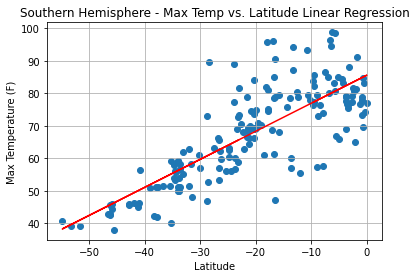

In [29]:
x_values = pd.to_numeric(southern_hemisphere_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

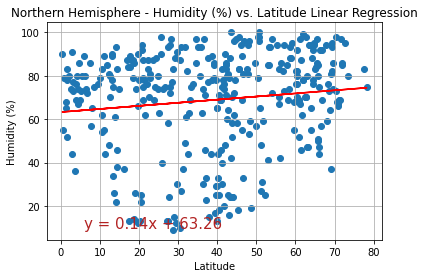

In [28]:
x_values = pd.to_numeric(northern_hemisphere_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

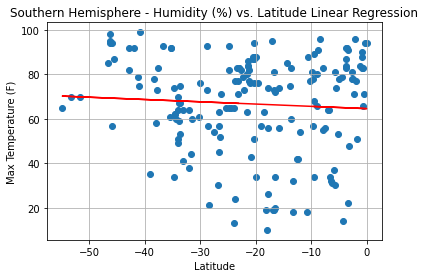

In [31]:
x_values = pd.to_numeric(southern_hemisphere_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

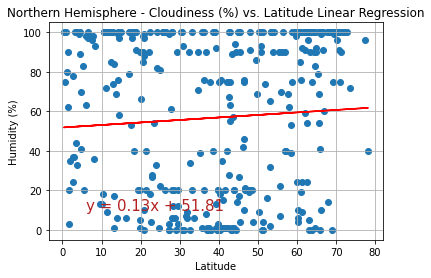

In [33]:
x_values = pd.to_numeric(northern_hemisphere_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

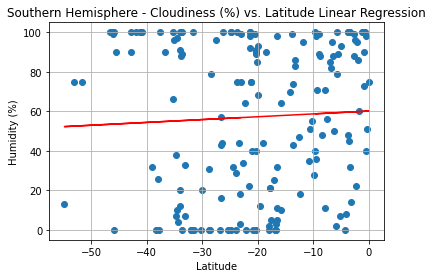

In [34]:
x_values = pd.to_numeric(southern_hemisphere_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

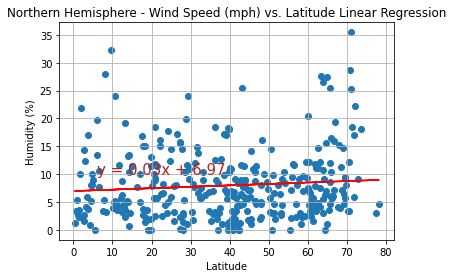

In [35]:
x_values = pd.to_numeric(northern_hemisphere_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

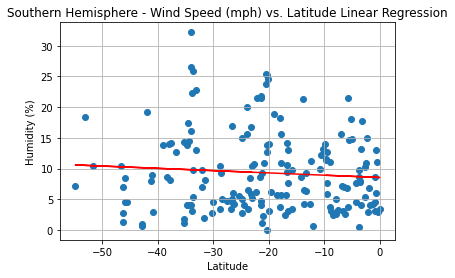

In [36]:
x_values = pd.to_numeric(southern_hemisphere_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="firebrick")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.grid(True)
plt.savefig("../Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()